# Homework 2

In this assignment we will use data about the price of housing vs lot size

In [1]:
######## DO NOT CHANGE THIS CODE ##########

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")

# extract price and lotsize columns as np arrays
X, Y =  np.array(df['lotsize']), np.array(df['price'])

# shuffle the data
np.random.seed(0)
inds_shuffle = np.random.permutation(len(Y))
X, Y = X[inds_shuffle], Y[inds_shuffle]

# reshape to column vectors
X, Y = X.reshape(-1,1), Y.reshape(-1,1)

# print the shapes of X and Y
print(X.shape); print(Y.shape)
###########################################

(546, 1)
(546, 1)


## 1 Create training and test data
(a) [1 pt] Create new numpy (column) arrays called $\texttt{X\_train, X\_test, Y\_train}$, and $\texttt{Y\_test}$, where the training dataset contains the first 80% of samples (rounding sample index down) and the testing dataset contains the last 20% of samples. 

(b) [1 pt] Use print statements to print the shape of the training and testing datasets.

In [2]:
# TODO create new arrays
nocolumn = X.shape[0]
X_train = X[:int(0.8 * nocolumn), :]
Y_train = Y[:int(0.8 * nocolumn), :]
X_test = X[int(0.8 * nocolumn):, :]
Y_test = Y[int(0.8 * nocolumn):, :]
# TODO print
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(436, 1)
(436, 1)
(110, 1)
(110, 1)


## 2 Scatter plot
- [1 pt] On the same figure, make scatterplots of the training and testing data. The x-coordinate should be the lot size, X, and the y-coordinate should be the price, Y.

- [1 pt] Use point markers with different shapes and colors to show to training and testing datasets. 

- [1 pt] Include x axis labels, y axis labels, an approapriate title, and a legend.

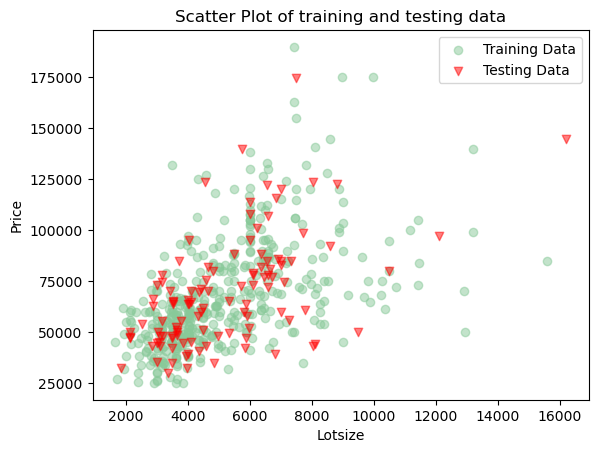

In [3]:
# TODO plot

plt.scatter(X_train, Y_train, color='#88c999', alpha=0.5, marker = 'o', label='Training Data')

plt.scatter(X_test, Y_test, color='red', alpha=0.5, marker = 'v', label='Testing Data')

plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Scatter Plot of training and testing data')
plt.legend()
plt.show()

# 3 (Custom) Least Squares Linear Regression
(a) [1 pt] Without using sklearn or other packages, implement least squared linear regression to fit a line to the __training__ data using the linear model, $Y=a^T X + b$, where $a$ is a vector of weight coefficients for each feature and $b$ is a scalar offset. 

(b) [1 pt] Store the values obtained by the model for $a$ and $b$ as $\texttt{a\_custom}$ and $\texttt{b\_custom}$. Print $\texttt{a\_custom}$ and $\texttt{b\_custom}$.

(Hint: 
- Augment the data $\texttt{X\_train}$ with an additional column of ones. Why? $Y=a^T X + b$ is in the form $ f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x)$ that you learned in lecture. In this homework question, what is $\beta_1, \beta_2$? What are the two basis functions $\phi_1, \phi_2$? 
- Your solution include calculation of the moore-penrose inverse.)

In [4]:
# TODO code up custom linear regression
ones = np.ones(X_train.shape)
newX_train = np.hstack((X_train, ones))
betahat = np.linalg.pinv(newX_train) @ Y_train
a_custom = betahat[0][0]
b_custom = betahat[1][0]
print('a = %f. b = %f' % (a_custom, b_custom))

a = 6.543678. b = 34302.267165


(c) [1 pt] Use your fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_custom}$. 

(d) [1 pt] Using the same fitted model, repeat the prediction for training inputs, $\texttt{X\_train}$, and name that ouput $\texttt{Y\_train\_pred\_custom}$.

In [5]:
# TODO predict
Y_test_pred_custom = a_custom * X_test + b_custom
Y_train_pred_custom = a_custom * X_train + b_custom

# 4 (sklearn) Least Squares Linear Regression
(a) [1 pt] Use sklearn.linear_model.LinearRegression() to fit a linear model to the training data. See their documentation for how to use the model.

(b) [1 pt] Store the values obtained by sklearn model for $a$ and $b$ as $\texttt{a\_sklearn}$ and $\texttt{b\_sklearn}$. Print $\texttt{a\_sklearn}$ and $\texttt{b\_sklearn}$.

**Verify that the $a$ and $b$ values you obtained manually and by sklearn are the same.**

In [6]:
from sklearn.linear_model import LinearRegression

# TODO use sklearn
reg = LinearRegression().fit(X_train, Y_train)
a_sklearn = reg.coef_
b_sklearn = reg.intercept_
print('a = %f. b = %f' % (a_sklearn, b_sklearn))

a = 6.543678. b = 34302.267165


(c) [1 pt] Use your sklearn fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_sklearn}$. 

(d) [1 pt] Using the same sklearn fitted model, repeat the prediction for training inputs, $\texttt{X\_train}$, and name that ouput $\texttt{Y\_train\_pred\_sklearn}$.

In [7]:
# TODO predict
regg = LinearRegression().fit(X_test, Y_test)
Y_test_pred_sklearn = regg.coef_ * X_test + regg.intercept_
Y_train_pred_sklearn = reg.coef_ * X_train + reg.intercept_

(e)
- [1 pt] On the same figure, make scatterplots of the actual testing data and the prediction from the fitted model. The x-coordinate should be the lot size, X, and the y-coordinate should be the price, Y.

- [1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Include x axis labels, y axis labels, an approapriate title, and a legend.

Text(0.5, 1.0, 'Actual testing data versus sklearn prediction')

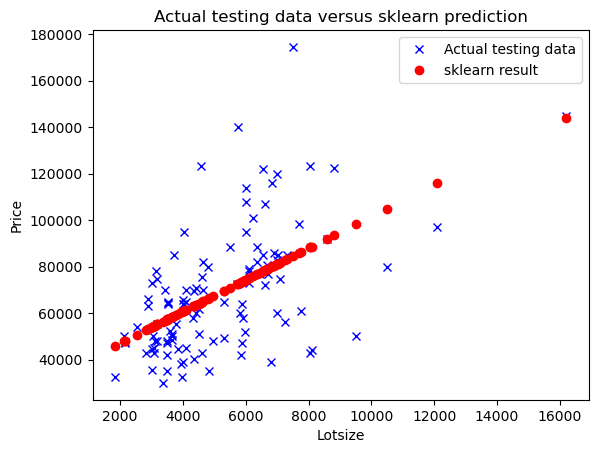

In [8]:
# TODO plot
plt.plot(X_test, Y_test, 'bx', label = 'Actual testing data')
plt.plot(X_test, Y_test_pred_sklearn, 'ro', label = 'sklearn result')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.legend()
plt.title('Actual testing data versus sklearn prediction')

# 5 Residual
(a) [1 pt] Compute the residual for both the training and test data, storing them as $\texttt{res\_train}$ and $\texttt{res\_test}$. 

(The residual is "predicted values from the linear model" minus "the actual values of $\texttt{Y}$".)

In [9]:
# TODO compute residual
res_train = Y_train - Y_train_pred_sklearn
res_test = Y_test - Y_test_pred_sklearn

(b) [2 pt] Plot two density histograms on different figures: one for the training residuals, one for the testing residuals. Standardize your range to (-100 000, 75000).

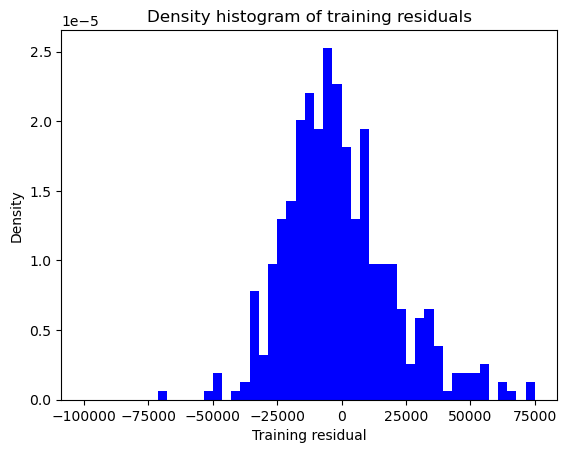

In [10]:
# TODO plot train residual histogram
plt.hist(res_train, bins = np.linspace(-100000, 75000, 50), density=True, color='blue')
plt.title("Density histogram of training residuals")
plt.xlabel("Training residual")
plt.ylabel("Density")
plt.show()

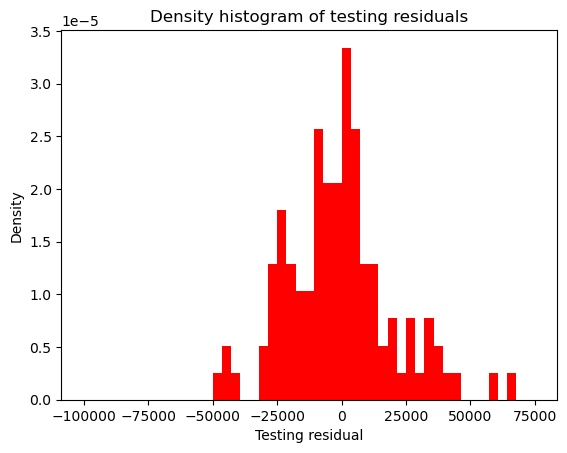

In [11]:
# TODO plot test residual histogram
plt.hist(res_test, bins = np.linspace(-100000, 75000, 50), density=True, color='red')
plt.title("Density histogram of testing residuals")
plt.xlabel("Testing residual")
plt.ylabel("Density")
plt.show()

(c) [1 pt] Are the shapes of the histograms roughly similar? Provide a written description about what the impact of over-fitting would look like in these plots. 

A: (Yes, both histograms look roughly similar. When over-fitting occurs, the model learns the training data so well that even noises are considered in it as well, resulting in very close-to-zero training residuals. Hence, the density histogram will have a very sharp peak at 0. For the testing data, an over-fitting model will generate larger residuals since the model is so familiar with seen training data. It is unable to model unseen data well. Hence, the density histogram of testing residuals will not look like that of training residuals, winding up less spiky at residual = 0 and spread more widely across surrounding residuals around 0.)